In [2]:
import pandas as pd
df=pd.read_csv(r"c:\DATA SCIENCE\Machine_Learning\logistic regession\Data_Sets\HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df=df.drop_duplicates()   #removing the duplicate values and assing it to the df
df.shape

(11991, 10)

In [13]:
df.duplicated().sum()

np.int64(0)

In [3]:
df.shape

(14999, 10)

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
print("null values : ",df.isnull().sum().sum())
print("duplicated values : ",df.duplicated().sum())
#since we are not having any duplicates and no null values 

null values :  0
duplicated values :  0


In [20]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<Axes: xlabel='satisfaction_level', ylabel='Count'>

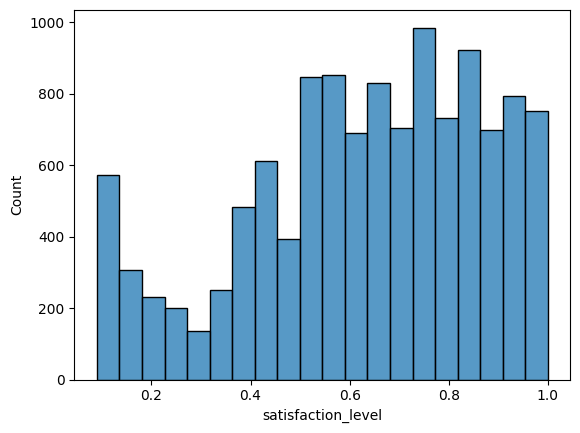

In [24]:
#performing some eda 
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df["satisfaction_level"],bins=20)


<Axes: xlabel='Department', ylabel='count'>

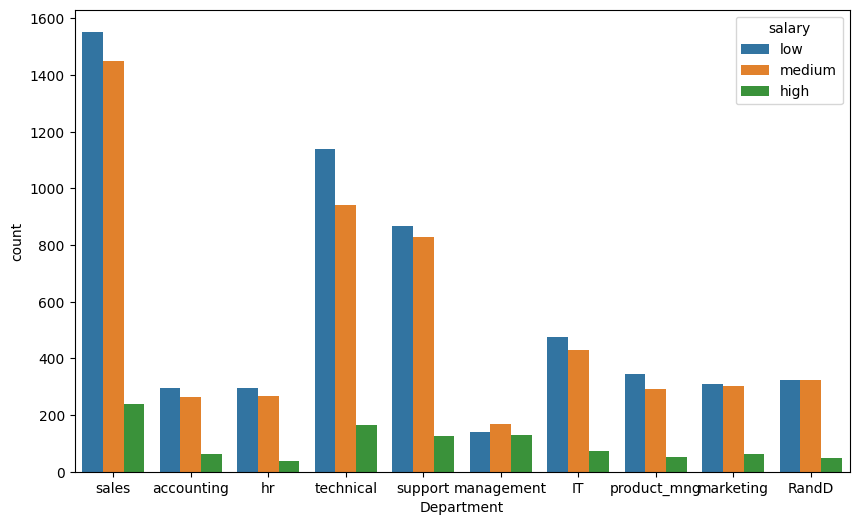

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x="Department",data=df,hue='salary')

<Axes: xlabel='Department', ylabel='count'>

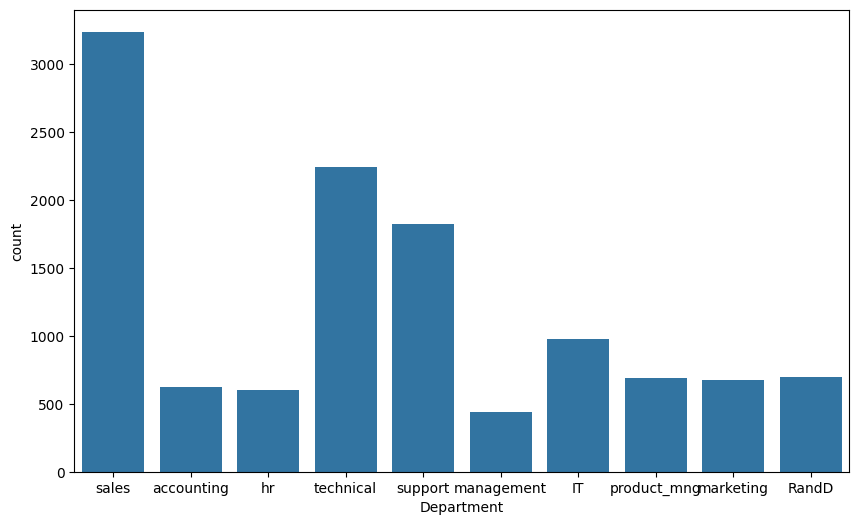

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x="Department",data=df)

<Axes: xlabel='salary', ylabel='count'>

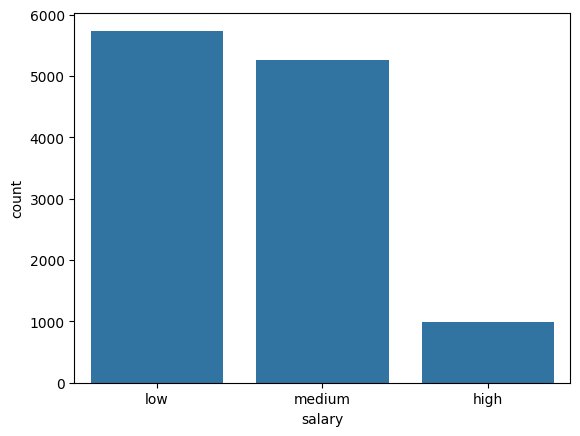

In [30]:
sns.countplot(x="salary",data=df)

In [32]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

<Axes: xlabel='left', ylabel='number_project'>

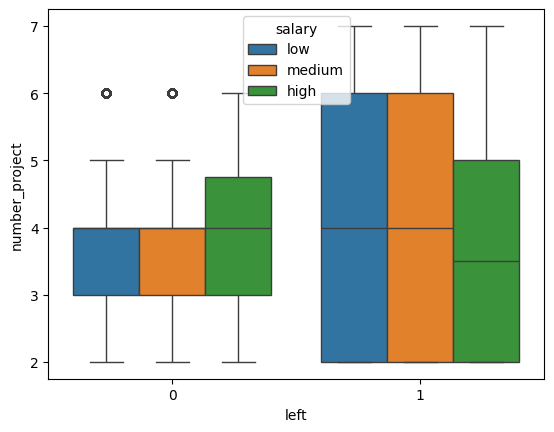

In [40]:
sns.boxplot(x="left",y="number_project",data=df,hue="salary")

<Axes: xlabel='left', ylabel='satisfaction_level'>

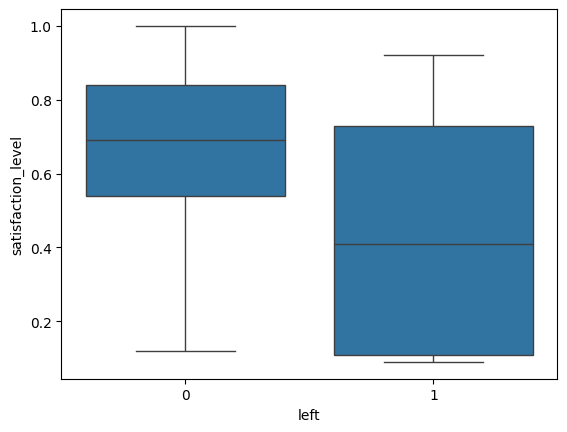

In [37]:
sns.boxplot(x="left",y="satisfaction_level",data=df,)

<Axes: xlabel='satisfaction_level', ylabel='count'>

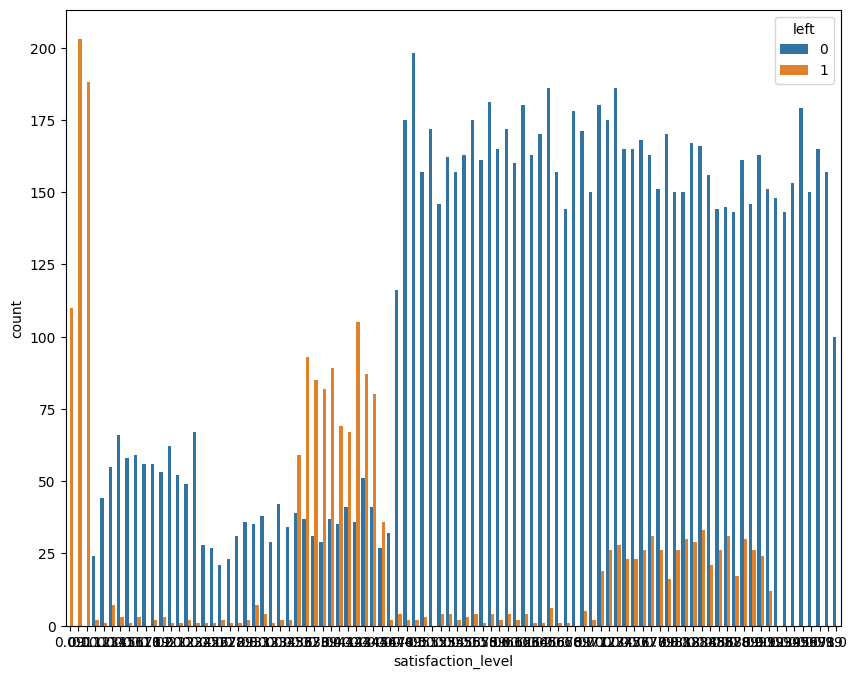

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x="satisfaction_level",data=df,hue="left")

<Axes: xlabel='salary', ylabel='count'>

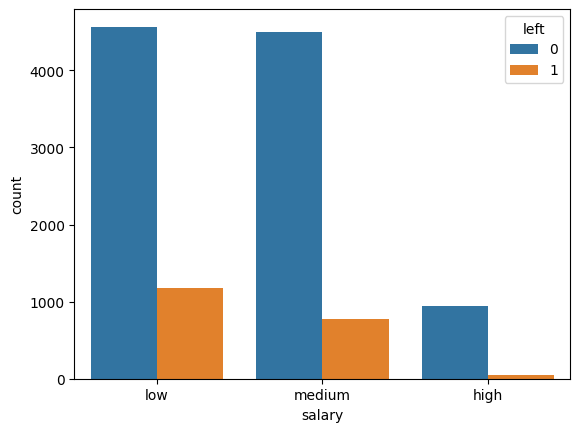

In [34]:
sns.countplot(x="salary",data=df,hue="left")

In [57]:
#building the model
x=df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years']]
y=df["left"]
x.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0


In [88]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2210,train_size=0.8,test_size=0.2)
print(x_train.shape)
print(x_test.shape)

(9592, 7)
(2399, 7)


In [89]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
predic=model.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,predic))
print(confusion_matrix(y_test,predic))

0.8286786160900376
[[1908   88]
 [ 323   80]]
